# 0.1 Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 0.1.1 Loading datasets

In [2]:
df_eda = pd.read_csv('../data/interim/eda_train.csv')

# 1.0 EDA

In [61]:
def check_imbalance(df: pd.DataFrame)-> pd.DataFrame: 
    total = df.shape[0]
    no_count = df['response'].value_counts().iloc[0]
    yes_count = df['response'].value_counts().iloc[1]

    def highlight(val):
        return 'background-color: red; color: white; font-weight: bold;' if val < 20 else ''

    no_percentage = (no_count/total) * 100
    yes_percentage = 100 - no_percentage

    df_dist = pd.DataFrame({'no_count': no_count,
                            'yes_count': yes_count,
                            'no_percentage': no_percentage,
                            'yes_percentage': yes_percentage
                }, index=[0]).style.map(highlight, subset=['no_percentage','yes_percentage'])

    return df_dist 


In [62]:
check_imbalance(df_eda)

,no_count,yes_count,no_percentage,yes_percentage
0,334399,46710,87.743664,12.256336


## 1.1 Univariate analysis

In [3]:
df_eda.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,Has License,28,No,Old,Yes,40454.0,26,217,Yes
1,2,Male,76,Has License,3,No,Nearly New,No,33536.0,26,183,No
2,3,Male,47,Has License,28,No,Old,Yes,38294.0,26,27,Yes
3,4,Male,21,Has License,11,Yes,New,No,28619.0,152,203,No
4,5,Female,29,Has License,41,Yes,New,No,27496.0,152,39,No


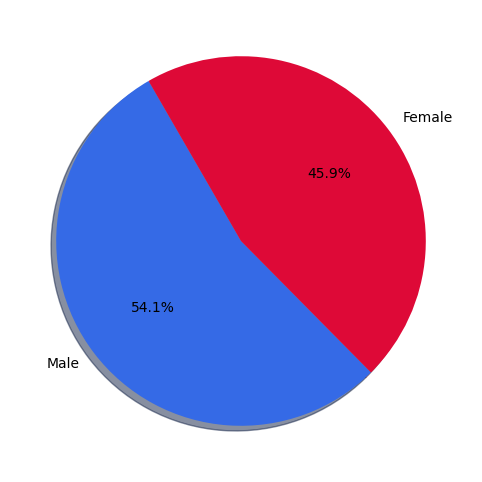

In [4]:
# Gender Representation
plt.figure(figsize=(9, 6))
plt.pie(df_eda['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, startangle=120, colors=["#356ae6", "#de0937"])
plt.show()

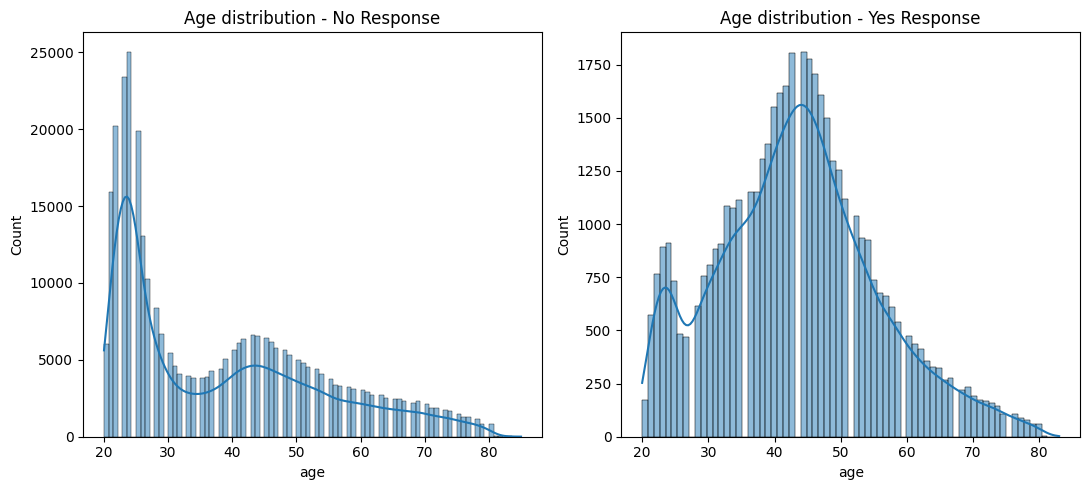

In [5]:
# age hist
df_aux1 = df_eda.loc[df_eda['response'] == 'No',:]
df_aux2 = df_eda.loc[df_eda['response'] == 'Yes',:]

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.title('Age distribution - No Response')
sns.histplot(df_aux1['age'], kde=True)

plt.subplot(1,2,2)
plt.title('Age distribution - Yes Response')
sns.histplot(df_aux2['age'], kde=True)

plt.tight_layout()


<Axes: title={'center': 'Age distribution by Response'}, xlabel='response', ylabel='age'>

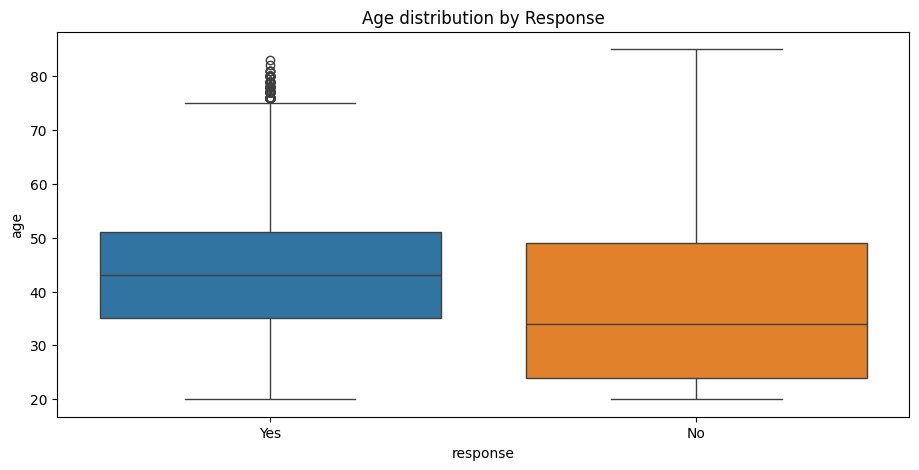

In [6]:
# age boxplot
plt.figure(figsize=(11,5))
plt.title('Age distribution by Response')
sns.boxplot(x='response', y='age', hue='response' ,data=df_eda)

In [7]:
df_eda.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,Has License,28,No,Old,Yes,40454.0,26,217,Yes
1,2,Male,76,Has License,3,No,Nearly New,No,33536.0,26,183,No
2,3,Male,47,Has License,28,No,Old,Yes,38294.0,26,27,Yes
3,4,Male,21,Has License,11,Yes,New,No,28619.0,152,203,No
4,5,Female,29,Has License,41,Yes,New,No,27496.0,152,39,No


In [8]:
# driving_license
df_aux3 = df_eda.loc[df_eda['driving_license'] == 'Has License',['driving_license', 'response']].groupby(['response']).count().reset_index()
df_aux3

,response,driving_license
0,No,333628
1,Yes,46669


Text(0.5, 1.0, 'Percentage of Customers with Driving License by Response')

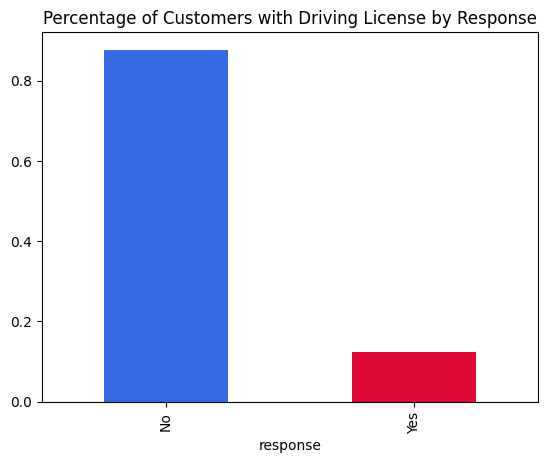

In [9]:
df_aux3['percentage'] = df_aux3['driving_license'] / df_aux3['driving_license'].sum()
df_aux3.plot(kind='bar', x='response', y='percentage', legend=False, color=['#356ae6', '#de0937'])
plt.title('Percentage of Customers with Driving License by Response')

<Axes: xlabel='region_code', ylabel='id'>

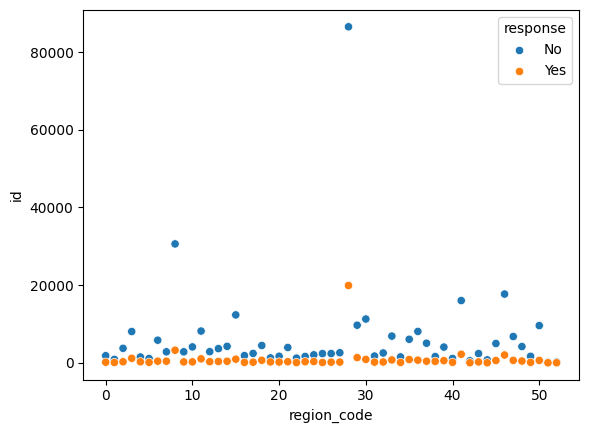

In [10]:
# region_code
df_aux = df_eda[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(data=df_aux, x= 'region_code', y='id', hue='response')

<Axes: xlabel='region_code', ylabel='id'>

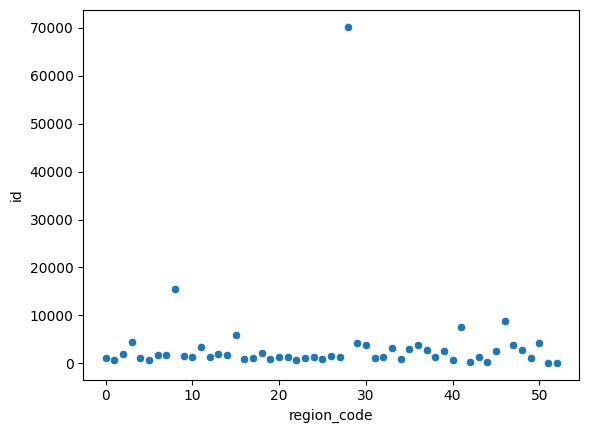

In [29]:
df_aux1 = df_eda[df_eda['vehicle_damage'] == 'Yes']
df_aux2 = df_aux1[['id', 'region_code']].groupby(['region_code']).count().reset_index()
sns.scatterplot(data=df_aux2, x='region_code', y='id')

<Axes: xlabel='age', ylabel='id'>

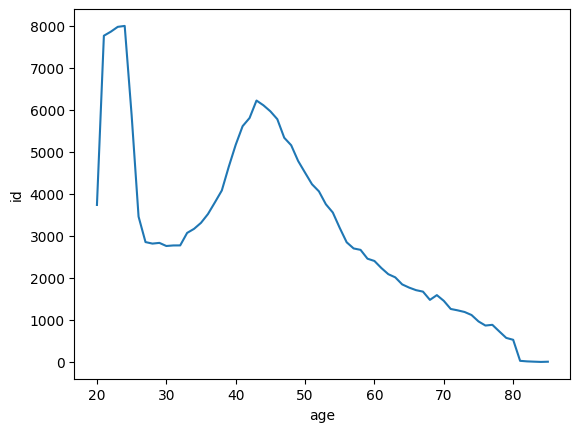

In [32]:
# previously_insured
df_aux1 = df_eda[df_eda['previously_insured'] == 'No']
df_aux2 = df_aux1[['id', 'age']].groupby(['age']).count().reset_index()
sns.lineplot(data=df_aux2, x='age', y='id')


In [12]:
# vehicle_age

In [13]:
# vehicle_damage

In [14]:
# annual_premium

In [15]:
# policy_sales_channel

In [16]:
# vintage

In [17]:
# Top 10 most sucessful sales channel
df_aux1 = df_eda.loc[df_eda['response'] == 'Yes',:]
df_aux2 = df_aux1.loc[:,['policy_sales_channel', 'response']].groupby('policy_sales_channel').count().sort_values(by='response', ascending=False).reset_index().head(10)
df_aux2

,policy_sales_channel,response
0,26,15891
1,124,13996
2,152,3858
3,156,2297
4,157,1794
5,122,1720
6,154,1474
7,163,880
8,160,475
9,155,395


<Axes: xlabel='policy_sales_channel', ylabel='response'>

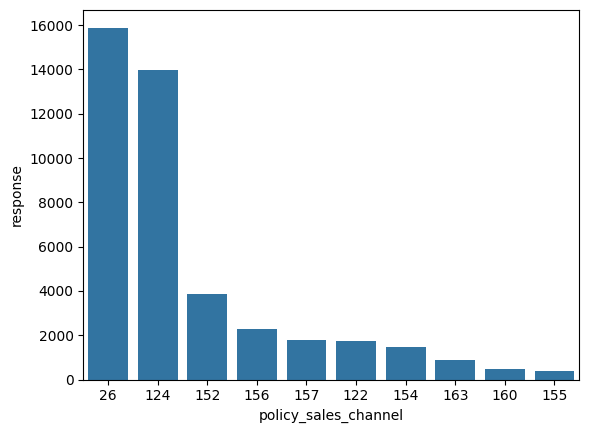

In [18]:
sns.barplot(data=df_aux2,x='policy_sales_channel', y='response', order=df_aux2['policy_sales_channel'])

In [19]:
# Min max fidelity time of clients
print(f'Max years as client: {df_eda["vintage"].max()} years \nMin years as client: {df_eda["vintage"].min()} years')

Max years as client: 299 years 
Min years as client: 10 years


---

## Visualizations

In [20]:
# Vehicle age distribution
df_eda['vehicle_age'].value_counts()

vehicle_age
Nearly New    200316
New           164786
Old            16007
Name: count, dtype: int64

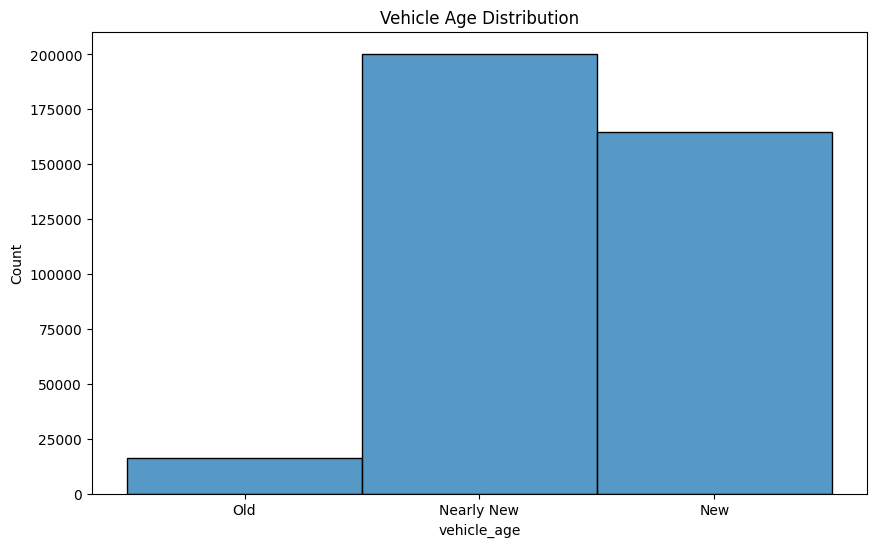

In [21]:
# Vehicle age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['vehicle_age'])
plt.title('Vehicle Age Distribution')
plt.show()

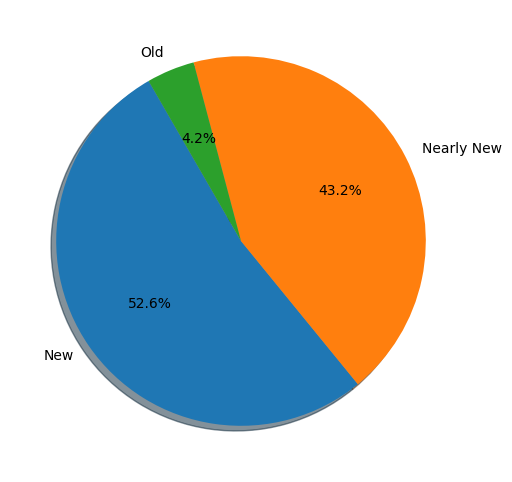

In [22]:
# Vehicle Representation
plt.figure(figsize=(9, 6))
plt.pie(df_eda['vehicle_age'].value_counts(), labels=['New', 'Nearly New', 'Old'], autopct='%1.1f%%', shadow=True, startangle=120)
plt.show()